# RCS Data Analysis - Curve Fitting

In [3]:
# We will be using SciPY Python library for mathematics,science and engineering
# https://www.scipy.org/ comes with Anaconda
# Most important external Python library NumPy library underneath: http://www.numpy.org/
# Data from the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing

# It is made available under the MIT License
import scipy as sp

In [5]:
data = sp.genfromtxt('web_traffic.tsv', delimiter='\t') #default is comma, so we need to specify tab as delimiter

In [6]:
type(data)

numpy.ndarray

In [7]:
data[:12]

array([[1.000e+00, 2.272e+03],
       [2.000e+00,       nan],
       [3.000e+00, 1.386e+03],
       [4.000e+00, 1.365e+03],
       [5.000e+00, 1.488e+03],
       [6.000e+00, 1.337e+03],
       [7.000e+00, 1.883e+03],
       [8.000e+00, 2.283e+03],
       [9.000e+00, 1.335e+03],
       [1.000e+01, 1.025e+03],
       [1.100e+01, 1.139e+03],
       [1.200e+01, 1.477e+03]])

In [8]:
# what is our data structure like
data.shape

(743, 2)

In [9]:
# We need to clean and preprocess our data a bit:
# split is with index notation (comes from NumPy)
x =data[:, 0] # we grab everything from first dimension(rows) and only the first(0th) column
y = data[:,1]

In [10]:
# how many Nan(invalid entries ) are there ? Too many and we would have a problem
sp.sum(sp.isnan(y))

8

In [11]:
# we use a negative mask to select only those values which are not NAN
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]
len(x),len(y) #sanity check

(735, 735)

In [12]:
# Visualizating our data
import matplotlib.pyplot as plt

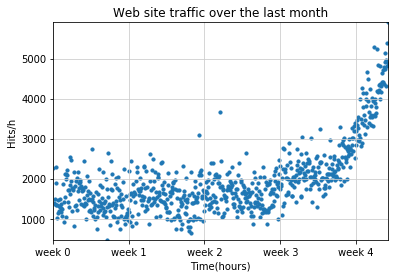

In [14]:
# plot the (x,y) points with dots of size 10
plt.scatter(x, y, s=10)
plt.title("Web site traffic over the last month")
plt.xlabel("Time(hours)")
plt.ylabel("Hits/h")
plt.xticks([w*7*24 for w in range(10)],
          [f'week {w}' for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.80')
plt.show()

### Question when will our traffic reach 50,000 hits an hour ? (We'll need a new server by then..)

## We will need to extrapolate with some model

# All models are wrong, but some models are useful

https://en.wikipedia.org/wiki/All_models_are_wrong

In [17]:
#### Error function
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

# NumPy thus SciPy strength is vectorized functions, we do all calculations at once or near once, good for larger datasets!

## Could our data be a simple linear progression (straight line )?

In [21]:
#SciPY has polyfit function
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

In [22]:
print(f"Model Parameters {fp1}")

Model Parameters [  2.59619213 989.02487106]


In [ ]:
# this means f(x) = 2.59619213 * x + 989.02487106 is our linear function

In [23]:
#Error
print(residuals)

[3.17389767e+08]


In [31]:
# poly1d() to create a model function from the model parameters
f1 = sp.poly1d(fp1)
err1=error(f1, x, y)
err1

317389767.33977807

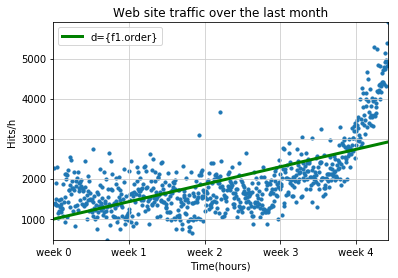

In [29]:
plt.scatter(x, y, s=10)
plt.title("Web site traffic over the last month")
plt.xlabel("Time(hours)")
plt.ylabel("Hits/h")
plt.xticks([w*7*24 for w in range(10)],
          [f'week {w}' for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.80')

fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=3, color="green")
plt.legend(["d={f1.order}"], loc="upper left")

plt.show()

### Hmm first 3-4 weeks seem OK, but then what happens? Is our model really linear?

In [32]:
## Absolute errors not useful but good for comparing to other values
err1

317389767.33977807

In [33]:
# Lets try a 2nd order function(square)
f2p = sp.polyfit(x, y, 2)
f2p

array([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03])

In [35]:
f2 = sp.poly1d(f2p) # we need a function from what we just generated
err2 = error(f2, x, y)
err2

179983507.8781792

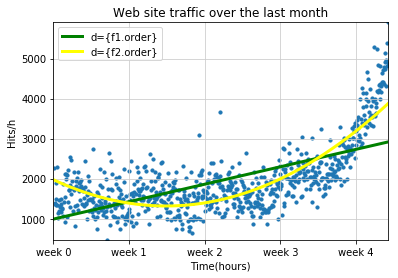

In [86]:
plt.scatter(x, y, s=10)
plt.title("Web site traffic over the last month")
plt.xlabel("Time(hours)")
plt.ylabel("Hits/h")
plt.xticks([w*7*24 for w in range(10)],
          [f'week {w}' for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.80')

fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=3, color="green")
#plt.legend(["d={f1.order}"], loc="upper left")

plt.plot(fx, f2(fx), linewidth=3, color="yellow")
plt.legend(["d={f1.order}","d={f2.order}"], loc="upper left")

plt.show()

In [93]:
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']
def plot_models(x, y, models, fname=None, mx=None, ymax=None, xmin=None, maxhours=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(10, 8))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], [f'week {w}' for w in range(10)])

    if models:
        if mx is None:
            if maxhours is None:
                mx = sp.linspace(0, x[-1], 1000)
            else:
                mx = sp.linspace(0, maxhours, 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend([f"d={m.order}" for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    if fname != None:
        plt.savefig(fname)

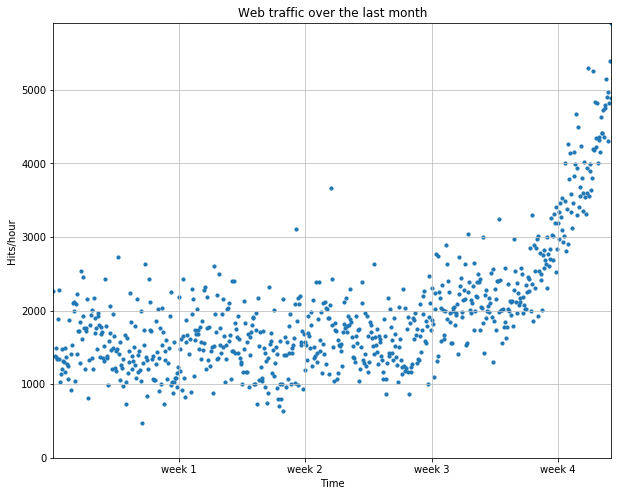

In [79]:
plot_models(x, y, None, "nomodels.png")

In [43]:
models=[f1,f2]

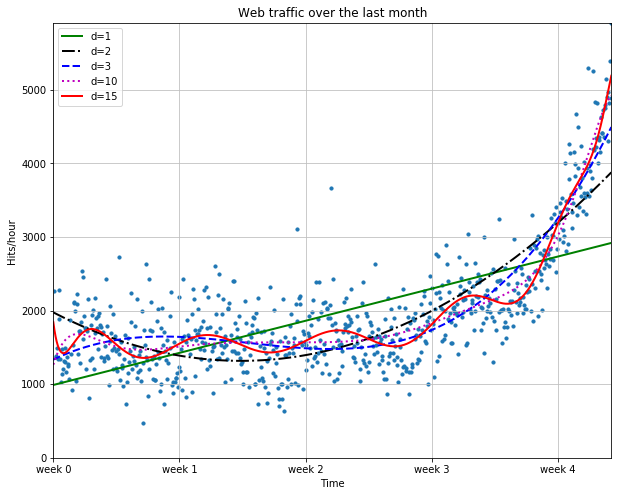

In [80]:
plot_models(x, y, models, "models.png")

In [52]:
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))
f15 = sp.poly1d(sp.polyfit(x, y, 15))

In [53]:
#models+=[f3,f10]
models+=[f15]

In [54]:
models

[poly1d([  2.59619213, 989.02487106]),
 poly1d([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03]),
 poly1d([ 3.04960132e-05, -2.35893797e-02,  4.94226019e+00,  1.33328797e+03]),
 poly1d([-3.73981968e-22,  1.36473756e-18, -2.14294406e-15,  1.89884971e-12,
        -1.04570108e-09,  3.70867731e-07, -8.45604588e-05,  1.19167041e-02,
        -9.41618606e-01,  3.33703840e+01,  1.26421204e+03]),
 poly1d([-1.75011090e-33,  9.34972139e-30, -2.23812743e-26,  3.17326622e-23,
        -2.96997099e-20,  1.93809424e-17, -9.09471940e-15,  3.12659766e-12,
        -7.96353454e-10,  1.50887917e-07, -2.10736366e-05,  2.09372310e-03,
        -1.36561115e-01,  5.02675488e+00, -7.86093248e+01,  1.84096090e+03])]

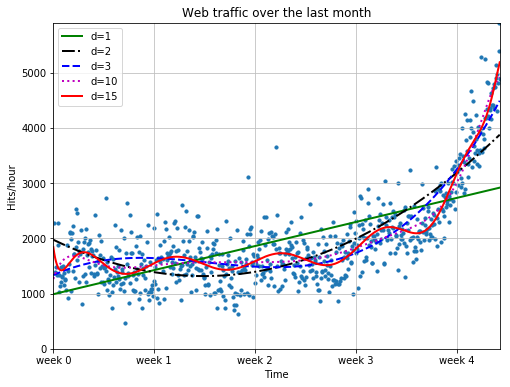

In [55]:
plot_models(x,y, models, "mod5.png")

In [62]:
for m in models:
    print(f"{m} \nError: {error(m, x, y)}\n")

 
2.596 x + 989 
Error: 317389767.33977807

         2
0.01053 x - 5.265 x + 1975 
Error: 179983507.8781792

          3           2
3.05e-05 x - 0.02359 x + 4.942 x + 1333 
Error: 139350144.03172523

           10             9             8             7             6
-3.74e-22 x  + 1.365e-18 x - 2.143e-15 x + 1.899e-12 x - 1.046e-09 x
              5             4           3          2
 + 3.709e-07 x - 8.456e-05 x + 0.01192 x - 0.9416 x + 33.37 x + 1264 
Error: 121942326.36352624

           15            14             13             12            11
-1.75e-33 x  + 9.35e-30 x  - 2.238e-26 x  + 3.173e-23 x  - 2.97e-20 x 
              10             9             8             7
 + 1.938e-17 x  - 9.095e-15 x + 3.127e-12 x - 7.964e-10 x
              6             5            4          3         2
 + 1.509e-07 x - 2.107e-05 x + 0.002094 x - 0.1366 x + 5.027 x - 78.61 x + 1841 
Error: 112482232.97559264



## Inflection point (human look)

In [67]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)


In [68]:
for m in [fa,fb]:
    print(f"{m} \nError: {error(m, x, y)}\n")

 
0.8399 x + 1400 
Error: 465906112.0737664

 
21.07 x - 1.092e+04 
Error: 30035502983.248466



In [ ]:
## Trusting Error 

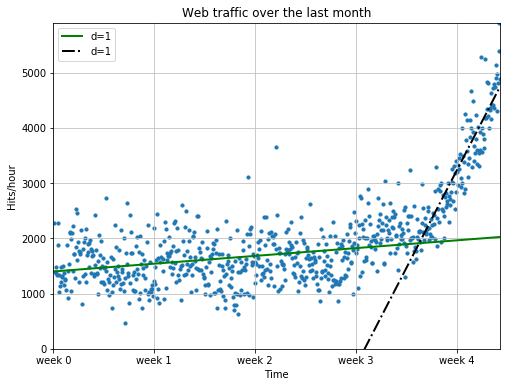

In [71]:
plot_models(x,y, [fa,fb], "modab.png")

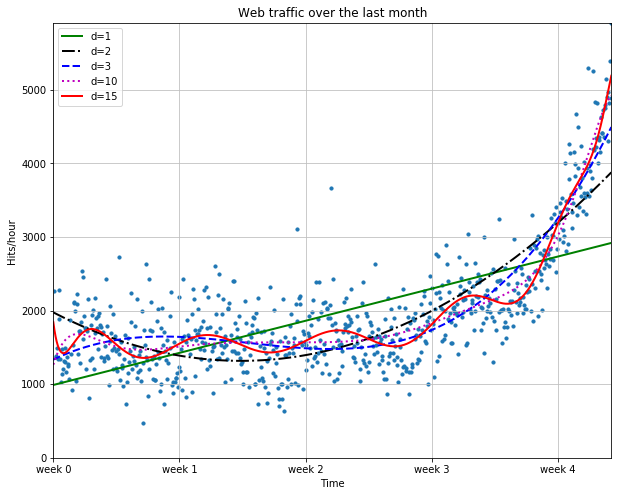

In [89]:
plot_models(x,y, models)

In [90]:
mx = sp.linspace(0, 1200, 1000)

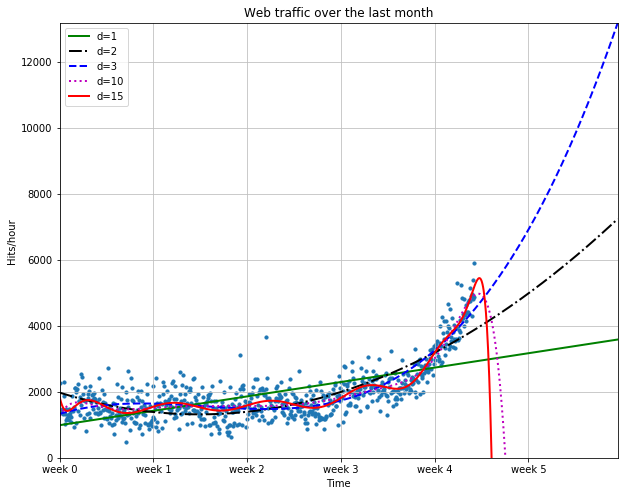

In [95]:
plot_models(x,y, models, maxhours=1000)

# Bad case of overfitting!! on d10 and d15

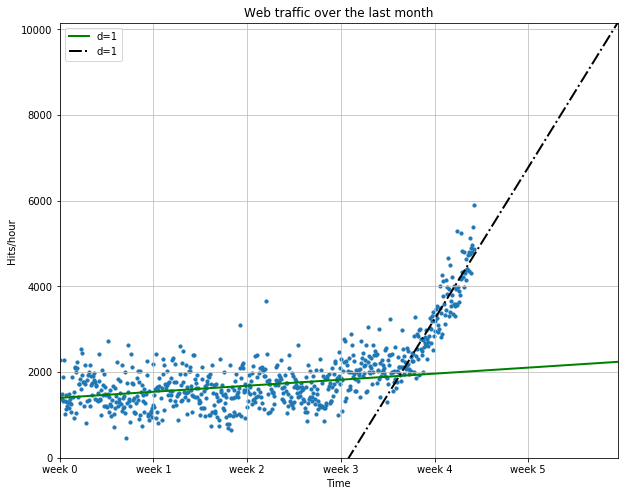

In [100]:
plot_models(x,y, [fa,fb], maxhours=1000)

In [ ]:
# Solving equations

In [108]:
from scipy.optimize import fsolve
print(fb)
print(fb - 500000)
reached_max = fsolve(fb - 50000, x0=800) / (7 * 24) # x0 is the starting estimate for speedup
print(f"50,000 hits/hour expected in week {reached_max[0]}")

 
21.07 x - 1.092e+04
 
21.07 x - 5.109e+05
50,000 hits/hour expected in week 17.207845638622217


In [109]:
reached_max

array([17.20784564])

In [ ]:
# Solve documentation https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fsolve.html